<a href="https://colab.research.google.com/github/soulaimane2/CNN_Small_Proj/blob/master/CNN_CIFAR10_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers , datasets
import matplotlib.pyplot
tf.__version__

'2.2.0'

In [68]:
(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data()
x_train , x_test = x_train / 255. , x_test / 255.
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [69]:
y_test , y_train = y_test.flatten() , y_train.flatten()
y_test.shape , y_train.shape

((10000,), (50000,))

In [70]:
uniques = len(set(y_train))
uniques

10

In [0]:
model = tf.keras.Sequential([
                             layers.Input(shape=x_train[0].shape),
                             layers.Conv2D(32,(3,3),strides= 2,activation='relu'),
                             layers.Conv2D(64,(3,3),strides= 2,activation='relu'),
                             layers.Conv2D(128,(3,3),strides=2,activation='relu'),
                             layers.Flatten(),
                             layers.Dropout(0.2),
                             layers.Dense(1024,activation='relu'),
                             layers.Dropout(0.2),
                             layers.Dense(1024,activation='relu'),
                             layers.Dense(uniques,activation='softmax')
])

In [0]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [75]:
r = model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 86s 55ms/step - loss: 1.5477 - accuracy: 0.4334
Epoch 2/15
1563/1563 [==============================] - 87s 56ms/step - loss: 1.2193 - accuracy: 0.5608
Epoch 3/15
1563/1563 [==============================] - 82s 53ms/step - loss: 1.0498 - accuracy: 0.6246
Epoch 4/15
1563/1563 [==============================] - 87s 56ms/step - loss: 0.9277 - accuracy: 0.6701
Epoch 5/15
1563/1563 [==============================] - 85s 54ms/step - loss: 0.8242 - accuracy: 0.7051
Epoch 6/15
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7431 - accuracy: 0.7347
Epoch 7/15
1563/1563 [==============================] - 86s 55ms/step - loss: 0.6672 - accuracy: 0.7616
Epoch 8/15
1563/1563 [==============================] - 87s 56ms/step - loss: 0.5995 - accuracy: 0.7854
Epoch 9/15
1563/1563 [==============================] - 87s 55ms/step - loss: 0.5376 - accuracy: 0.8081
Epoch 10/15
1563/1563 [==============================] - 87s 56m

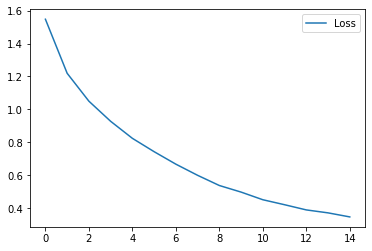

In [76]:
plt = matplotlib.pyplot
plt.plot(r.history['loss'],label = "Loss")
plt.legend()

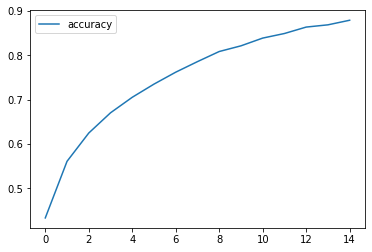

In [77]:
plt.plot(r.history['accuracy'],label = "accuracy")
plt.legend()

In [78]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0663 - accuracy: 0.6998


[1.0663223266601562, 0.6998000144958496]

In [0]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'predicted value {automobile} | true value{automobile}')

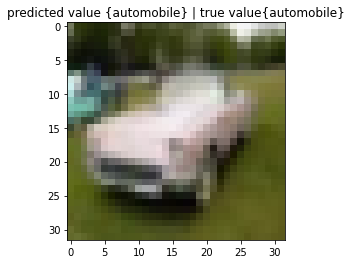

In [81]:
predicted_values = model.predict(x_test).argmax(axis=1)
random_num = np.random.choice(x_test.shape[0])
plt.imshow(x_test[random_num])
plt.title("predicted value {%s} | true value{%s}"%(labels[predicted_values[random_num]],labels[y_test[random_num]]))